In [1]:
# Basic Python package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string 
import re

In [2]:
# File paths
train_file = r"C:\Users\prits\Downloads\Data\cleaned_ghc_train.csv"
test_file = r'C:\Users\prits\Downloads\Data\cleaned_ghc_test.csv'

# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_file)

In [3]:
train_df['label'].value_counts()

0    19126
1     2650
Name: label, dtype: int64

In [4]:
train_df['hd'].value_counts()

0    19929
1     1847
Name: hd, dtype: int64

In [5]:
train_df['cv'].value_counts()

0    21646
1      130
Name: cv, dtype: int64

In [6]:
train_df['vo'].value_counts()

0    20410
1     1366
Name: vo, dtype: int64

In [7]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


# Class Distribution Before Sampling

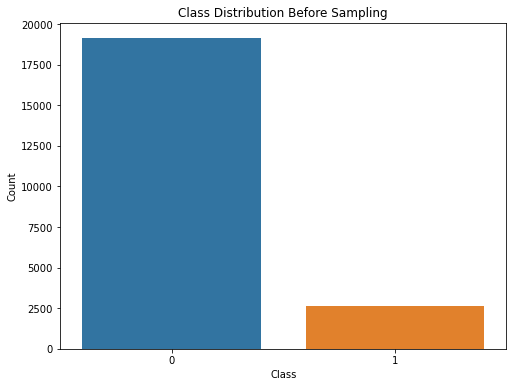

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of classes before sampling
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_df)
plt.title('Class Distribution Before Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

HANDLING IMBALANCED DATA

In [9]:
#class count
count_class_0,count_class_1=train_df.label.value_counts()

In [10]:
df_class_0=train_df[train_df['label']==0]
df_class_1=train_df[train_df['label']==1]

In [11]:
df_class_0.shape

(19126, 5)

In [12]:
df_class_1.shape

(2650, 5)

1).Random Under Sampling:
    Random under-sampling involves randomly removing samples from     the majority class until the number of instances in the majority class is reduced to a level that is comparable to the minority class. 

In [13]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1], axis=0)
df_test_under.shape
print('Random under sampling:')
print(df_test_under.label.value_counts())

Random under sampling:
0    2650
1    2650
Name: label, dtype: int64


Random under sampling:
0    2650
1    2650
Name: label, dtype: int64


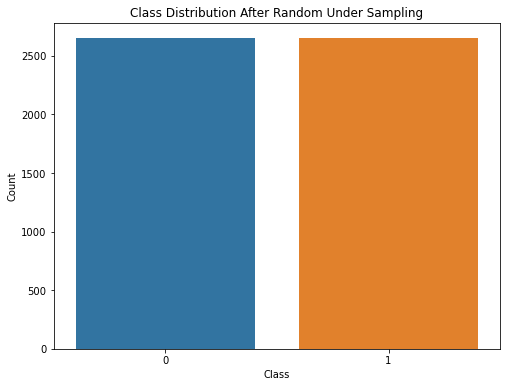

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_class_0 and df_class_1 are already defined, and count_class_1 is set
# df_class_0_under = df_class_0.sample(count_class_1)
# df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

# Uncomment the above two lines if df_class_0_under and df_test_under are not already defined.

# Print the value counts of the 'hd' column in df_test_under
print('Random under sampling:')
print(df_test_under['label'].value_counts())

# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_test_under)
plt.title('Class Distribution After Random Under Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


2).Random Over Sampling:Random under-sampling involves randomly removing samples from the majority class until the number of instances in the majority class is reduced to a level that is comparable to the minority class. 

In [15]:
X=df_test_under.drop('label',axis='columns')
y=df_test_under['label']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [16]:
y_train.value_counts()

1    2120
0    2120
Name: label, dtype: int64

In [17]:
count_class_0,count_class_1

(19126, 2650)

In [18]:
df_class_1.sample(2000,replace=True).shape

(2000, 5)

In [19]:
count_class_0,count_class_1

(19126, 2650)

In [20]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape

(38252, 5)

In [21]:
print('Random over Sampling:')
print(df_test_over.label.value_counts())

Random over Sampling:
0    19126
1    19126
Name: label, dtype: int64


Random over sampling:
0    19126
1    19126
Name: label, dtype: int64


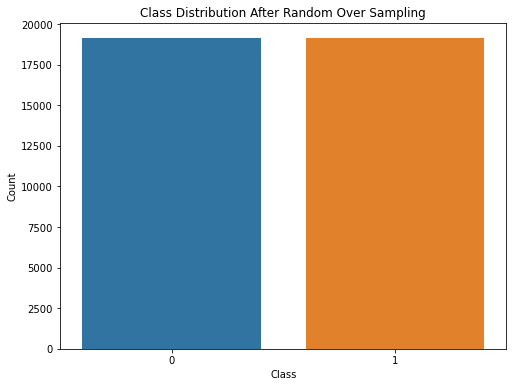

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_class_0 and df_class_1 are already defined, and count_class_1 is set
# df_class_0_under = df_class_0.sample(count_class_1)
# df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

# Uncomment the above two lines if df_class_0_under and df_test_under are not already defined.

# Print the value counts of the 'hd' column in df_test_under
print('Random over sampling:')
print(df_test_over['label'].value_counts())

# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_test_over)
plt.title('Class Distribution After Random Over Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


3).SMOTE:
SMOTE (Synthetic Minority Over-sampling Technique) is a popular method used to handle imbalanced datasets by generating synthetic samples for the minority class. Unlike random over-sampling, which simply duplicates existing instances, SMOTE creates new, synthetic instances by interpolating between existing minority class instances. This can help in reducing overfitting and improving the model's ability to generalize.

In [23]:
#smote
columns_to_drop = [ 'text','label']
X=train_df.drop(columns=columns_to_drop)
y=train_df['label']

In [24]:
y.value_counts()

0    19126
1     2650
Name: label, dtype: int64

In [25]:
pip install -U imbalanced-learn

In [26]:
from imblearn.over_sampling import SMOTE
# This means SMOTE will oversample the minority class until the number of instancesis equal to the number of instances in the majority class.
smote = SMOTE(sampling_strategy='minority')
# Apply SMOTE to the dataset (X, y).
# X_sm and y_sm will be the resampled feature matrix and target vector, respectively.
X_sm, y_sm = smote.fit_resample(X, y)

# Checking the value counts of the resampled y
y_sm_value_counts = y_sm.value_counts()
print(y_sm_value_counts)


0    19126
1    19126
Name: label, dtype: int64


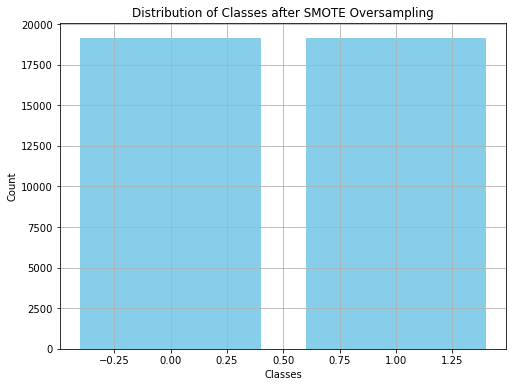

In [27]:
import matplotlib.pyplot as plt

# Assuming y_sm_value_counts is a pandas Series
classes = y_sm_value_counts.index
counts = y_sm_value_counts.values

plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Classes after SMOTE Oversampling')
plt.grid(True)
plt.show()


In [38]:
X=train_df['text'].values
y=train_df['label']

# Converting Text data into Numerical

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

train_df.dropna(subset=['text'], inplace=True)

def tfidf_embedding(text):
    vectorizer = TfidfVectorizer(max_features=5000)
    embeddings = vectorizer.fit_transform(text)
    return embeddings

#text = train_df['text'].values
X = tfidf_embedding(text)
print(X)


  (0, 4785)	0.1620296940882516
  (0, 2905)	0.38923917472124503
  (0, 1332)	0.38923917472124503
  (0, 2343)	0.3104641687725634
  (0, 1773)	0.12407978854649923
  (0, 492)	0.21140284704973647
  (0, 2951)	0.32600851987838764
  (0, 2126)	0.18885132253462167
  (0, 1400)	0.2977658298377288
  (0, 2342)	0.27002478385343953
  (0, 4503)	0.18297448250041176
  (0, 2606)	0.30605276712057433
  (0, 2879)	0.22706098159854585
  (0, 2065)	0.17896439019209592
  (1, 4902)	0.26136219694263846
  (1, 2996)	0.19093692873719764
  (1, 4246)	0.3532425513174643
  (1, 2420)	0.18222373574691075
  (1, 3958)	0.23702459173372586
  (1, 3892)	0.3286760103770535
  (1, 3598)	0.37005656618250765
  (1, 89)	0.1845526087907791
  (1, 2596)	0.38347050536924204
  (1, 1779)	0.35822709339486697
  (1, 4078)	0.18314192526077977
  :	:
  (21769, 3128)	0.23006431738505032
  (21769, 2919)	0.14194981143002833
  (21769, 2353)	0.07483758427314527
  (21769, 462)	0.2521107373031192
  (21769, 2960)	0.12316556882602916
  (21769, 683)	0.09300120

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Checking the value counts of the resampled y
y_sm_value_counts = y_sm.value_counts()
print(y_sm_value_counts)


0    19122
1    19122
Name: label, dtype: int64


In [51]:
#splitting the balanced data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(X_sm,y_sm,train_size=0.8,random_state=42,stratify=y_sm)

# Logistic Regression 

In [ ]:
Logistic regression is a statistical method used for binary classification that predicts the probability of an outcome belonging to one of two classes. 

In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
print('Accuracy:',model.score(x_test,y_test))

Accuracy: 0.8337037521244607


In [54]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3825
           1       0.81      0.87      0.84      3824

    accuracy                           0.83      7649
   macro avg       0.84      0.83      0.83      7649
weighted avg       0.84      0.83      0.83      7649



In [55]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
print(cm)


[[3325  499]
 [ 773 3052]]


# Naive Bayes

The Naïve Bayes classifier is a supervised machine learning algorithm that is used for classification tasks such as text classification. It uses principles of probability to perform classification tasks.

ADVANTAGE:
It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

In [63]:
from sklearn.naive_bayes import MultinomialNB

# Training the Naive Bayes model
classifier_md = MultinomialNB()
classifier_md.fit(X_sm, y_sm)

# Predictions
pred = nb_model.predict(x_test)

In [64]:
from sklearn import metrics
score = metrics.accuracy_score(y_test,pred)
print(score)

0.8479539809125376


In [65]:
cm=metrics.confusion_matrix(y_test,pred ,labels=[1,0])
print(cm)

[[3422  402]
 [ 761 3064]]


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      3825
           1       0.82      0.89      0.85      3824

    accuracy                           0.85      7649
   macro avg       0.85      0.85      0.85      7649
weighted avg       0.85      0.85      0.85      7649

